In [13]:
#!/usr/bin/env python
import numpy as np
from astropy.io import fits
import astropy.constants as const
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation
from astropy.wcs import WCS
import pylab as pl
import aplpy
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
from matplotlib import cm
import glob
from astropy import wcs
from astropy.cosmology import LambdaCDM
import os
import subprocess as sp
import cmasher as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


/Users/nicholebarry/miniforge3/envs/graphics/lib/python3.9/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/Users/nicholebarry/miniforge3/envs/graphics/lib/python3.9/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/var/folders/bq/wmsr1m_d2c94qwkmz9xyr3g80000gn/T/ipykernel_98325/3223558163.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.tight_layout()


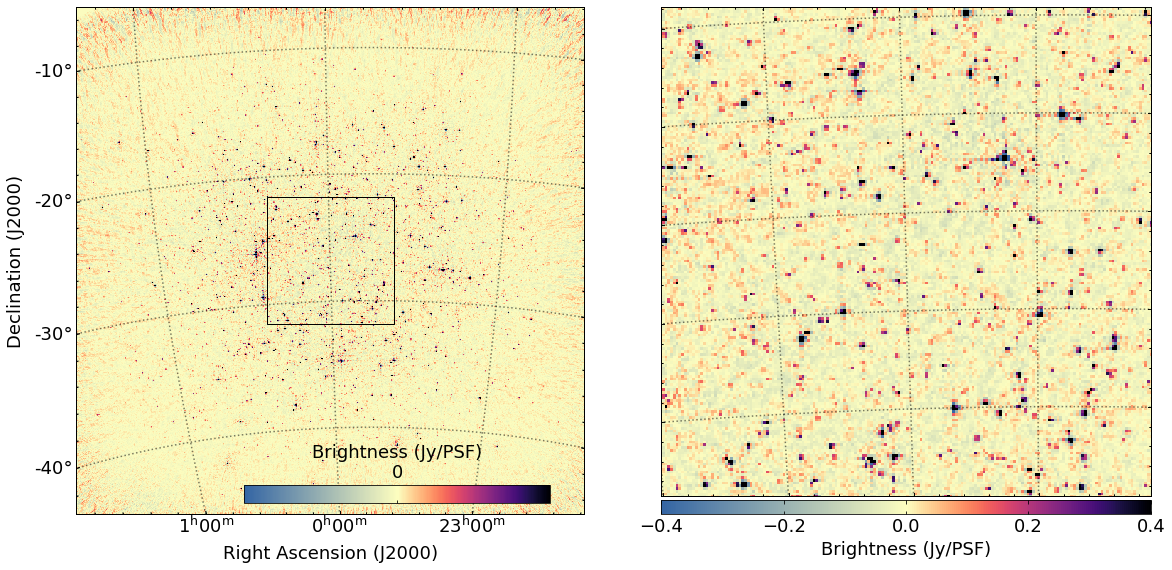

In [71]:
# Directory info and font sizing
dir1 = '/Users/nicholebarry/MWA/data/deep_images/'
#fits_name = 'zen.2458098.30131.HH.gleam02_stokes_uvcut.image'#'zenith_pointing_I_4096'
#output_name = 'zen.2458098.30131.HH.gleam02_stokes_uvcut.image'#'zenith_pointing_I_4096'
fits_name = 'zenith_pointing_I_4096'
output_name = 'zenith_pointing_I_4096_stamp'
fitslist = [dir1+fits_name+'.fits']
Jy_to_mJy = 1#1000
font_size=18
title_font_size=18

# Replace MWA header to by aplpy compatible
# Useful for quick-and-dirty diagnostic images,
# but in general works for even well-made images
for f in fitslist:
    fh = fits.getheader(f)
    fd = fits.getdata(f)

    hitems = ['PC1_3','PC1_4','PC2_3','PC2_4','PC3_1','PC3_2','PC3_3','PC3_4','PC4_1','PC4_2','PC4_3','PC4_4',\
        'CRPIX4','CDELT4','CRVAL4','CTYPE4','CRPIX3','CDELT3','CRVAL3','CTYPE3','CUNIT3','NAXIS4','NAXIS3','CUNIT4']

    for hi in hitems:
        try:
            fh.remove(hi)
        except:
            pass
    fh.set('NAXIS',2)
    fh.set('WCSAXES',2)

    fits.writeto(f.replace('.fits','.2ax.fits'),\
                 fd[:,:]*Jy_to_mJy, header=fh, overwrite=True)
        #fd[0,0,:,:]*Jy_to_mJy, header=fh, overwrite=True)

# Get image centre coordinates
fh = fits.getheader(dir1 + fits_name + '.2ax.fits')
ra_cent  = 0 #fh['CRVAL1']
dec_cent = -26.7834720612 #fh['CRVAL2']

# Image size and colorbar scale
vmin=-.4*Jy_to_mJy#-.2*Jy_to_mJy
vmax=.4*Jy_to_mJy#.2*Jy_to_mJy
imsz     = 40. #deg
imsz_zoom = 10. #deg

# LOFAR-style colormap
colors1 = mcolors.LinearSegmentedColormap.from_list("", ['#3465a4', pl.cm.magma.colors[-1]])(np.linspace(0, 1, 128))
colors2 = pl.cm.magma_r(np.linspace(0, 1, 128))
colors = np.vstack((colors1, colors2))
cmap = mcolors.LinearSegmentedColormap.from_list('BuMagma', colors)
#cmap='cmr.fusion'#'coolwarm'#'gnuplot2'#

# Figure 1 -- Full field of view (primary lobe)
fig = pl.figure(figsize=(17,8))#(21,8))
f1 = aplpy.FITSFigure(dir1 + fits_name +'.2ax.fits', figure=fig, subplot=(1,2,1))
f1.recenter(ra_cent, dec_cent, height=imsz, width=imsz)
f1.show_colorscale(cmap=cmap, stretch='linear',vmin=vmin,vmax=vmax)
f1.axis_labels.set_ytext('Declination (J2000)')
f1.axis_labels.set_xtext('Right Ascension (J2000)')
f1.tick_labels.set_yformat('dd')
f1.tick_labels.set_xformat('hh:mm')
f1.axis_labels.set_font(size=title_font_size)
f1.tick_labels.set_font(size=font_size)
f1.add_grid()
f1.grid.set_color('black')
f1.grid.set_linestyle('dotted')
f1.grid.set_linewidth(1.5)
a=pl.gca()
a.tick_params(direction='in', color='k',which='both')

# Box showing zoom on Figure 1
f1.show_rectangles(ra_cent, dec_cent, imsz_zoom, imsz_zoom)

# Colorbar for Figure 1 (works for Figure 2 as well)
f1.add_colorbar(box=[.22,.12,.25,.03],box_orientation='horizontal', ticks=[-10,-5, 0, 5, 10])#ticks=[-200,-100, 0, 100, 200])
f1.colorbar.set_font(size=font_size)
f1.colorbar.set_axis_label_font(size=title_font_size)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both', labelbottom=False, labeltop=True,labelsize=font_size)
a.set_title(r'Brightness (Jy/PSF)',size=title_font_size)

# Figure 2 -- Zoomed view (primary lobe)
f2 = aplpy.FITSFigure(dir1 + fits_name + '.2ax.fits', figure=fig, subplot=(1,2,2))
f2.recenter(ra_cent, dec_cent, height=imsz_zoom, width=imsz_zoom)
f2.show_colorscale(cmap=cmap, stretch='linear',vmin=vmin,vmax=vmax)
f2.axis_labels.set_ytext(' ')
f2.axis_labels.set_xtext('Right Ascension (J2000)')
f2.tick_labels.set_yformat('dd')
f2.tick_labels.set_xformat('hh:mm')
f2.axis_labels.set_font(size=title_font_size)
f2.tick_labels.set_font(size=font_size)
f2.add_grid()
f2.grid.set_color('black')
f2.grid.set_linestyle('dotted')
f2.grid.set_linewidth(1.5)
f2.axis_labels.hide_y()
f2.tick_labels.hide_y()
f2.axis_labels.hide_x()
f2.tick_labels.hide_x()
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')

# Colorbar for Figure 1 (works for Figure 2 as well)
f2.add_colorbar(location='bottom',box_orientation='horizontal', ticks=[-0.4,-0.2, 0, 0.2, 0.4])#ticks=[-200,-100, 0, 100, 200])
f2.colorbar.set_font(size=font_size)
f2.colorbar.set_axis_label_font(size=title_font_size)
f2.colorbar.set_axis_label_text(r'Brightness (Jy/PSF)')
a=pl.gca()
a.tick_params(direction='in', color='k', which='both', labelbottom=True, labeltop=False,labelsize=font_size)
#a.set_title(r'Brightness (Jy/PSF)',size=title_font_size)


pl.tight_layout()
pl.savefig(dir1+output_name+'.png', bbox_inches='tight', dpi=128)